<a href="https://colab.research.google.com/github/luongvantuit/learn-ai-with-python/blob/master/k-means/BT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-mnist

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Gọi các thư viện cần thiết
# Ta tự xây dựng phần k-means nên sẽ không gọi sklearn
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# Số cụm = 10
K = 10

In [4]:
from mnist import MNIST

mndata = MNIST('/content/drive/My Drive/Machine Learning/Dataset/MNIST',gz=True)

# Load training data
X_train, y_train = mndata.load_training()

# Convert lists to NumPy arrays and normalize
X_train = np.array(X_train) / 255.0  # Normalize pixel values to [0, 1]
y_train = np.array(y_train)

In [5]:
def kmeans_display(X, label):
  K = np.amax(label) + 1
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]
  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
  plt.axis('equal')
  plt.plot()
  plt.show()

In [6]:
def kmeans_init_centers(X, k):
  # randomly pick k rows of X as initial centers
  return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
  # calculate pairwise distances btw data and centers
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    # collect all points assigned to the k-th cluster
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

def has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [7]:
def kmeans(X, K):
  centers = [kmeans_init_centers(X, K)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1], K)
    if has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it += 1
  return (centers, labels, it)

Centers found by our algorithm:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


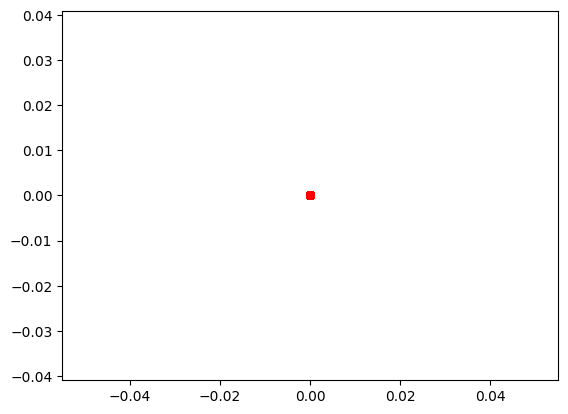

In [8]:
(centers, labels, it) = kmeans(X_train, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X_train, labels[-1])

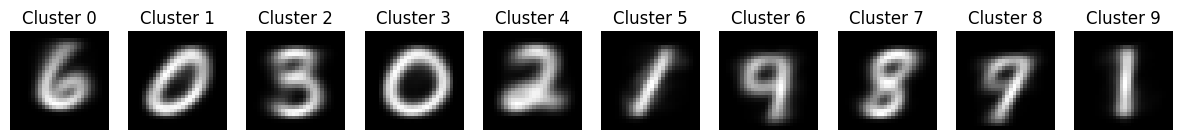

KMeans converged after 9 iterations.


In [9]:
# Visualize the resulting cluster centers
fig, axes = plt.subplots(1, K, figsize=(15, 4))
for i in range(K):
    center_image = centers[-1][i].reshape(28, 28)
    axes[i].imshow(center_image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Cluster {i}')
plt.show()

print(f"KMeans converged after {i} iterations.")